
# generating cases per 10K people chart reversed engineer from CovicNow website

# importing packages needed to run the scripts

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

over_population = 10000

# MoH Covic19 Github data - State new cases daily update

In [2]:
url_state_case = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv'
df_state_case = pd.read_csv(url_state_case, index_col=0)

# MoH Covic19 Github data - population - to get the list of states and the population

In [3]:
url_population = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/static/population.csv'
df_population = pd.read_csv(url_population, index_col='state')
df_population.rename(columns = {'pop': 'population'}, inplace = True)

df_population = df_population.drop('idxs', axis=1)
state_name_list = [state for state in df_population.index if state != 'Malaysia']

# MoH Covic19 Github data - country - to get the country data

In [4]:
url_country_case = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv'
df_country_case = pd.read_csv(url_country_case)

# calculate new cases value for whole country

In [5]:
#print('Malaysia',round(df_country_case.tail(14).cases_new.sum()/(df_population.loc['Malaysia'].population/1000),1))
case_per_1k  = {}
# case_per_1k['Malaysia'] = round(df_country_case.tail(14).cases_new.sum()/(df_population.loc['Malaysia'].population/over_population),1)
malaysia_value = round(df_country_case.tail(14).cases_new.sum()/(df_population.loc['Malaysia'].population/over_population),1)

# calculate new cases value for Klang Valley

In [6]:
kv_population = df_population.loc['Selangor'].population + \
                df_population.loc['W.P. Kuala Lumpur'].population + \
                df_population.loc['W.P. Putrajaya'].population
kv_new_cases = df_state_case[df_state_case.state.eq('Selangor')].cases_new.tail(14).sum() + \
                df_state_case[df_state_case.state.eq('W.P. Kuala Lumpur')].cases_new.tail(14).sum() + \
                df_state_case[df_state_case.state.eq('W.P. Putrajaya')].cases_new.tail(14).sum()
case_per_1k['Klang Vly.'] = round(kv_new_cases/(kv_population/over_population),1)

# calculate new cases value for each state and store in dictionary

In [7]:
for state in sorted(state_name_list):
    state_population = df_population.loc[state].population
    newcases_total = df_state_case[df_state_case.state.eq(state)].cases_new.tail(14).sum()
    case_per_1k[state] = round(newcases_total/(state_population/over_population), 1)

# sort the dictionary base on the new cases value

In [8]:
case_per_1k_sorted = {k: v for k, v in sorted(case_per_1k.items(), key=lambda item: item[1], reverse=True)}

# plotting the bar chart. add Malaysia to the first line

<AxesSubplot:>

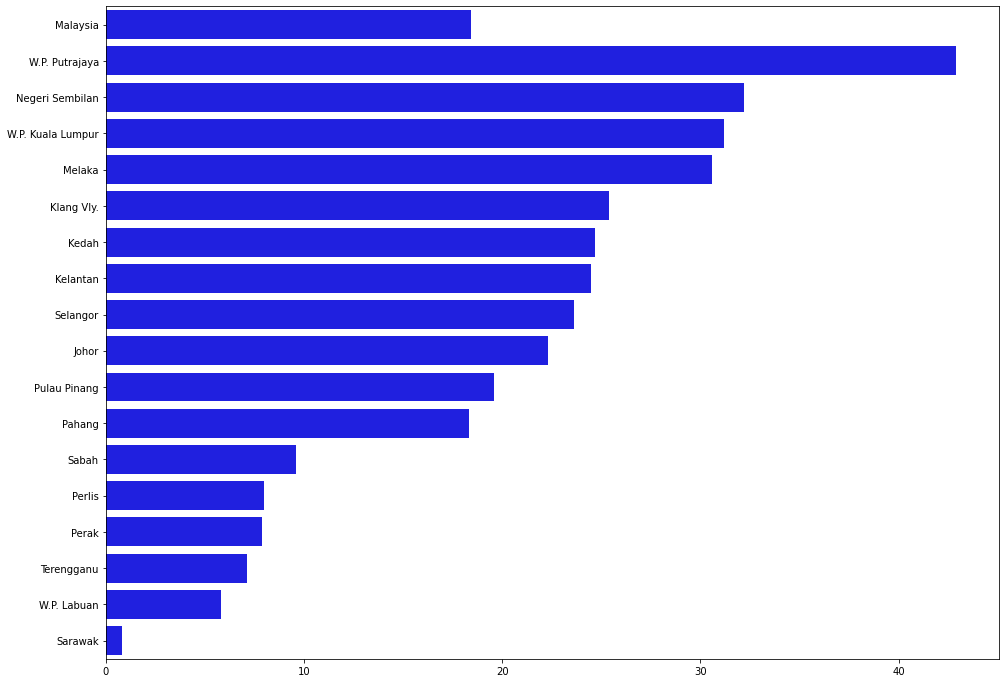

In [10]:
keys = list(case_per_1k_sorted.keys())
keys_my = ['Malaysia'] + keys
# get values in the same order as keys, and parse percentage values
vals = [float(case_per_1k_sorted[k]) for k in keys]
vals_my = [malaysia_value] + vals

fig, ax = plt.subplots(figsize=(16,12))
sns.barplot(y=keys_my, x=vals_my, color='Blue')
